In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# We will use a simple predictor for the distance covered in given time
# distances in miles
distances = torch.tensor([
    [1.0],
    [2.0],
    [3.0],
    [4.0]
    ],
    dtype=torch.float32)

In [3]:
# delivery times in minutes
times = torch.tensor([
    [6.96],
    [12.11],
    [16.77],
    [22.21]
    ],
    dtype=torch.float32)

# Understand Tensor

```
distances = [
    [1.0],
    [2.0]
]
```

Here the outer `[]` is a batch. Within that, each value `[1.0]` is a feature. If there were other things like temperature, day of week, etc. they would be individual values - `[ [dist, time, temperature] ]`

In [4]:
# definte the model
model = nn.Sequential(nn.Linear(1,1))

In [5]:
# define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
for epoch in range(500):
    # 0. reset the optimizer
    optimizer.zero_grad()

    #1. make prediction
    outputs = model(distances)

    #2. calculate the loss
    loss = loss_function(outputs, times)

    #3. calculate adjustments
    loss.backward()

    #4. update the model
    optimizer.step()

In [9]:
# let's make some predictions
with torch.no_grad(): #not in training mode
    test_distance = torch.tensor([[25.0]], dtype=torch.float32)
    predicted_time = model(test_distance)
    print(f"Predicted time for 25 miles: {predicted_time.item():.1f} minutes")

Predicted time for 25 miles: 127.4 minutes


In [10]:
# let's make some predictions
with torch.no_grad(): #not in training mode
    test_distance = torch.tensor([[3.5]], dtype=torch.float32)
    predicted_time = model(test_distance)
    print(f"Predicted time for 3.5 miles: {predicted_time.item():.1f} minutes")

Predicted time for 3.5 miles: 19.5 minutes


In [11]:
import matplotlib.pyplot as plt

In [12]:
# set model in eval mode
model.eval()
with torch.no_grad():
    predicted_times = model(distances)

In [13]:
predicted_times

tensor([[ 6.9953],
        [12.0135],
        [17.0316],
        [22.0498]])

Text(0, 0.5, 'Time (minutes)')

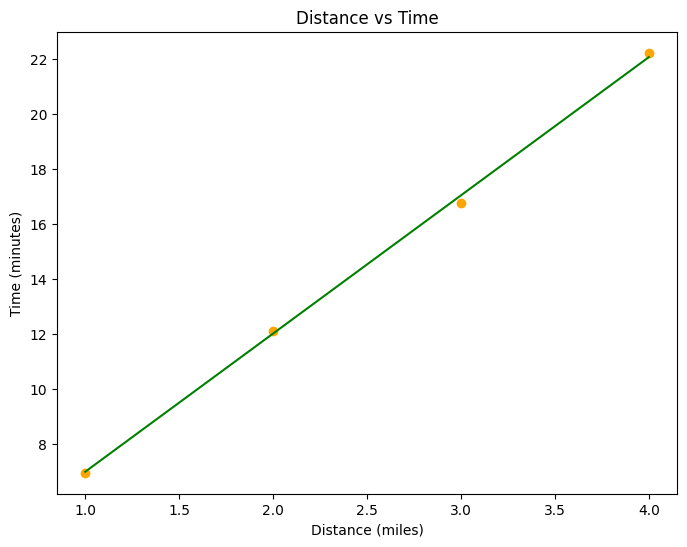

In [17]:
plt.figure(figsize=(8,6))
plt.plot(distances.numpy(), times.numpy(), color='orange', marker='o', linestyle='None', label='Actual delivery times')
plt.plot(distances.numpy(), predicted_times.numpy(), color='green', marker='None', label='Predicted times')
plt.title('Distance vs Time')
plt.xlabel('Distance (miles)')
plt.ylabel('Time (minutes)')

In [18]:
# new model - non linearity
distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

distances_mean = distances.mean()
distances_std = distances.std()

times_mean = times.mean()
times_std = times.std()

distances_norm = (distances - distances_mean) / distances_std
times_norm = (times - times_mean) / times_std

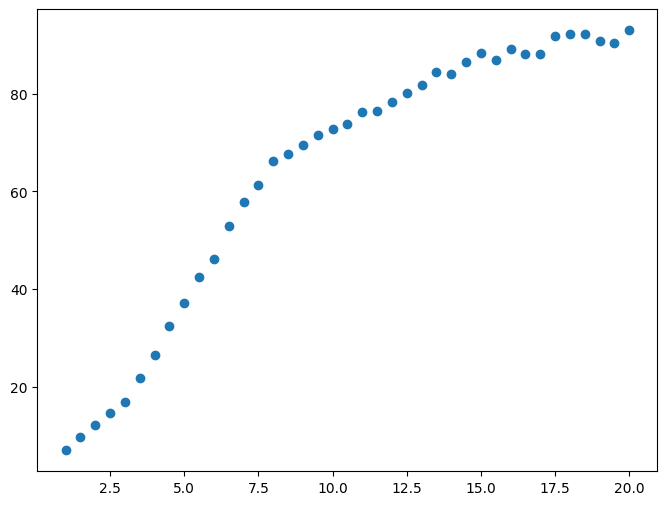

In [19]:
# plot the original data
plt.figure(figsize=(8,6))
plt.plot(
    distances.numpy(),
    times.numpy(),
    marker='o',
    linestyle='None',
    label='non linearity'
)

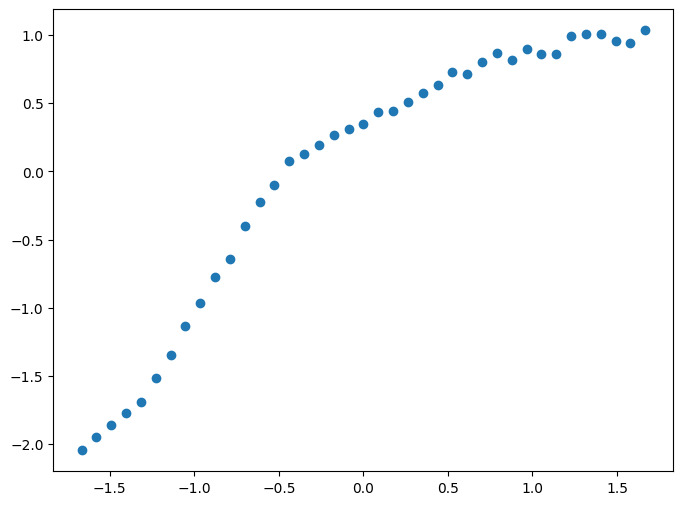

In [20]:
# plot the normalized data
# plot the original data
plt.figure(figsize=(8,6))
plt.plot(
    distances_norm.numpy(),
    times_norm.numpy(),
    marker='o',
    linestyle='None',
    label='non linearity'
)

In [27]:
# let's create the model

model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(),
    nn.Linear(3,3),
    nn.ReLU(),
    nn.Linear(3, 1)
)

loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [28]:
# now, let's train
for epoch in range(3000):
    optimizer.zero_grad()
    loss = loss_function(model(distances_norm), times_norm)

    loss.backward()
    optimizer.step()
print("Training complete.")
print(f"Final loss: {loss.item()}")

Training complete.
Final loss: 0.0018860461423173547


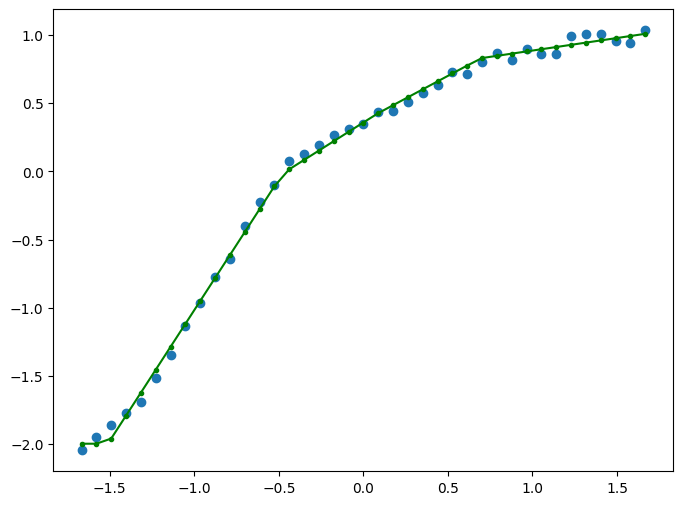

In [29]:
with torch.no_grad():
    # plot the normalized data
    # plot the original data
    plt.figure(figsize=(8,6))
    plt.plot(
        distances_norm.numpy(),
        times_norm.numpy(),
        marker='o',
        linestyle='None',
        label='non linearity'
    )

    predictions = model(distances_norm)
    plt.plot(distances_norm.numpy(), predictions.numpy(), color='green', marker='.')

In [31]:
distance_to_predict = 5.1

# now, let us predict
with torch.no_grad():
    distance_to_predict_norm = (torch.tensor([[distance_to_predict]], dtype=torch.float32) - distances_mean) / distances_std
    pred = model(distance_to_predict_norm)
    pred_actual_time = (pred * times_std) + times_mean

    print(f"Predicted time: {pred_actual_time.item():.1f} minutes")

Predicted time: 38.5 minutes
